In [1]:
!git clone https://github.com/Lucastera/FunsearchPlus

Cloning into 'FunsearchPlus'...
remote: Enumerating objects: 2200, done.
remote: Counting objects: 100% (2200/2200), done.
remote: Compressing objects: 100% (840/840), done.
remote: Total 2200 (delta 1416), reused 2114 (delta 1355), pack-reused 0 (from 0)
Receiving objects: 100% (2200/2200), 3.64 MiB | 9.47 MiB/s, done.
Resolving deltas: 100% (1416/1416), done.


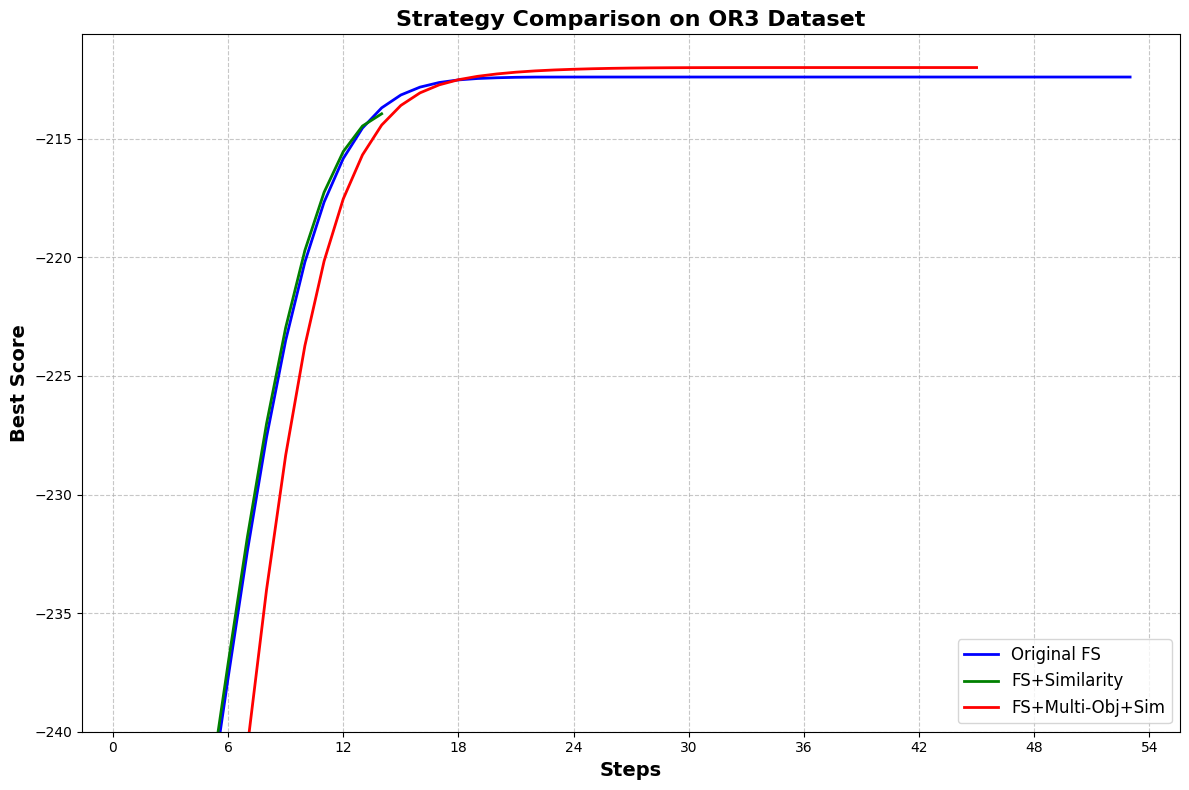

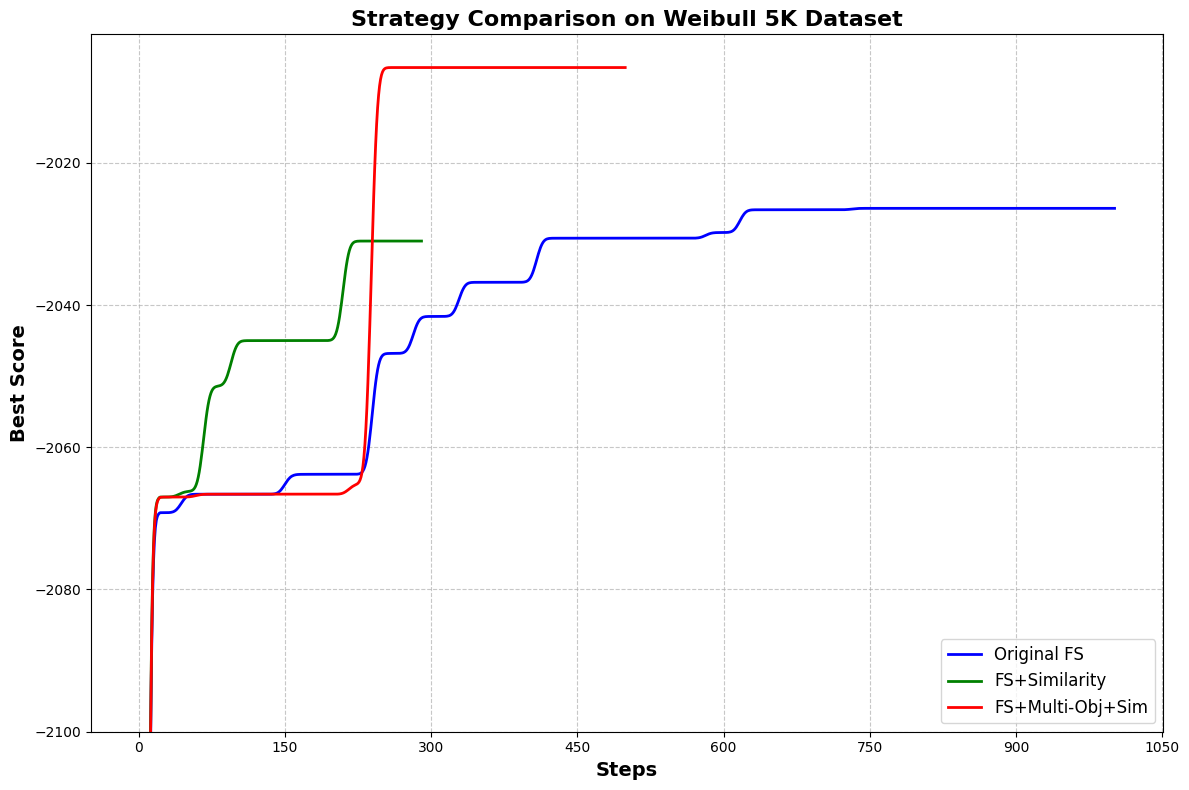

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import os
from matplotlib.ticker import MaxNLocator
import warnings

warnings.filterwarnings("ignore")

def load_data(filepath):
    """Load CSV data file with comma separator"""
    if os.path.exists(filepath):
        try:
            # Read comma-separated CSV file
            data = pd.read_csv(filepath)
            # Verify columns exist
            if "Wall time" in data.columns and "Step" in data.columns and "Value" in data.columns:
                return data
            else:
                print(f"File {filepath} doesn't have the expected columns. Found: {data.columns.tolist()}")
        except Exception as e:
            print(f"Error loading file {filepath}: {e}")
    else:
        print(f"File not found: {filepath}")
    return None

def smooth_curve(y, sigma=5):
    """Smooth curve using gaussian filter"""
    return gaussian_filter1d(y, sigma=sigma)

def plot_smooth_curves(dataset_name, file_paths, labels, colors, output_filename=None, y_min=None):
    """
    Plot smooth line charts similar to TensorBoard

    Parameters:
    - dataset_name: Name of the dataset
    - file_paths: List of file paths
    - labels: List of labels
    - colors: List of colors
    - output_filename: Output file name
    - y_min: Minimum value for y-axis (values below this will be truncated)
    """
    plt.figure(figsize=(12, 8))

    all_data = []
    all_values = []

    # Load all data
    for i, file_path in enumerate(file_paths):
        data = load_data(file_path)
        if data is not None:
            all_data.append(data)
            all_values.extend(data['Value'].values)

    # Plot complete data
    for i, data in enumerate(all_data):
        if data is not None:
            # Sort to ensure step is increasing
            data = data.sort_values('Step')
            steps = data['Step'].values
            values = data['Value'].values

            # Smooth curve
            smooth_values = smooth_curve(values)

            # Plot complete curve
            plt.plot(steps, smooth_values, color=colors[i], linewidth=2, label=labels[i])

    # Set y-axis limit based on dataset type
    if y_min is not None:
        # Find maximum value in data
        y_max = max(all_values)
        # Set appropriate upper bound with some margin
        margin = (y_max - y_min) * 0.05  # Add 5% margin
        plt.ylim(y_min, y_max + margin)

    # Use weight='bold' for the title and axis labels to make them bold
    plt.title(f'Strategy Comparison on {dataset_name} Dataset', fontsize=16, weight='bold')
    plt.xlabel('Steps', fontsize=14, weight='bold')
    plt.ylabel('Best Score', fontsize=14, weight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Position legend in bottom right corner
    plt.legend(fontsize=12, loc='lower right')

    # Set x-axis ticks to integers
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    # Set appropriate number of y-axis ticks
    plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))

    plt.tight_layout()

    # Save the image if an output filename is provided
    if output_filename:
        plt.savefig(output_filename, dpi=300, bbox_inches='tight')

    plt.show()

base_path = '/content/FunsearchPlus/result/best_score_result/'
# File paths
or3_files = [
    base_path + 'funsearch_or3__single_nodup.csv',
    base_path + 'funsearch_or3__single_dup_similarity.csv',
    base_path + 'funsearch_or3_quality_code_structure_algorithm_multi_dup_similarity.csv'
]

weibull_files = [
    base_path + 'funsearch_weibull__single_nodup.csv',
    base_path + 'funsearch_weibull__single_dup_similarity.csv',
    base_path + 'funsearch_weibull_quality_code_structure_algorithm_multi_dup_similarity.csv'
]

# Labels and colors
labels = ['Original FS', 'FS+Similarity', 'FS+Multi-Obj+Sim']
colors = ['blue', 'green', 'red']

# Plot line chart for OR3 dataset with minimum y-value of -240
plot_smooth_curves('OR3', or3_files, labels, colors, 'or3_comparison.png', y_min=-240)

# Plot line chart for Weibull dataset with minimum y-value of -2100
plot_smooth_curves('Weibull 5K', weibull_files, labels, colors, 'weibull_comparison.png', y_min=-2100)